In [1]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Decision Trees. Simple Example

### First, quickly review the simple example in the session notes:

In [2]:
data = {
    'age': [4, 2, 8, 7, 1, 5, 3],
    'type': ['red', 'green', 'red', 'red', 'green', 'red', 'green'],
    'produce': ['n', 'n', 'y', 'y', 'n', 'n', 'y']
}
dataset = pd.DataFrame.from_dict(data)

In [3]:
dataset

,age,type,produce
0,4,red,n
1,2,green,n
2,8,red,y
3,7,red,y
4,1,green,n
5,5,red,n
6,3,green,y


The decision tree classifier needs all of the input features to be numerical, so we are going to do a bit of pre-processing to convert the "type" from categorical to integer. This is done in sklearn using a Label Encoder:

In [4]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(dataset['type'])

dataset['type_encoded'] = encoder.transform(dataset['type'])

dataset

,age,type,produce,type_encoded
0,4,red,n,1
1,2,green,n,0
2,8,red,y,1
3,7,red,y,1
4,1,green,n,0
5,5,red,n,1
6,3,green,y,0


In [5]:
dec_tree = DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(dataset[['age', 'type_encoded']], dataset['produce'])

DecisionTreeClassifier(criterion='entropy')

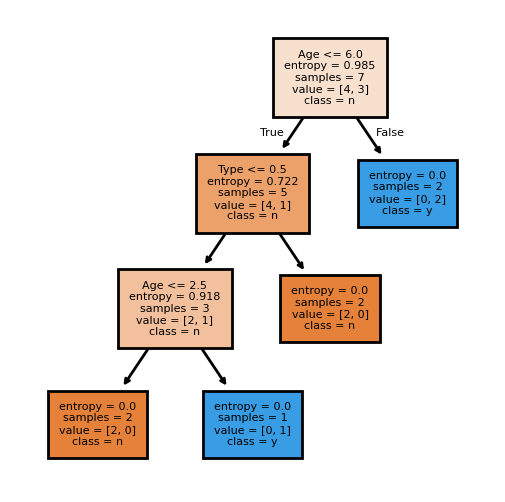

In [6]:
# Setting dpi = 200 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3, 3), dpi=200)

tree.plot_tree(dec_tree,
               feature_names = ['Age', 'Type'], 
               class_names= ['n', 'y'],
               label='all',
               impurity=True,
               proportion=False,
               filled=True,
               fontsize=4);

# Decision Trees. A bit more complex Example

### We will use a different dataset (enough with Iris)

First we load the dataset:

In [7]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer(return_X_y=False, as_frame=True)

In [8]:
breast_cancer_data = breast_cancer_data.frame

In [9]:
input_features = list(breast_cancer_data.columns[:-1])

In [10]:
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Now we split the data, some of it for training our Machine Learning algorithms, and other to test the results:

In [11]:
from sklearn.model_selection import train_test_split

PERCENTAGE_SAMPLES_USED_FOR_TESTING = 0.4

train, test = train_test_split(breast_cancer_data, test_size=PERCENTAGE_SAMPLES_USED_FOR_TESTING)
print('Using', len(train),'samples for training the model and',len(test),'samples for testing it later.')

Using 341 samples for training the model and 228 samples for testing it later.


### And now we can simply fit our Decision Tree

#### First we will do it with its default parameters (let the tree grow as much as it wants), and check its accuracy with our test data
#### And afterwards we will set some constrain parameters and modify the defaults

Accuracy:  92.11 %
Depth of the decision tree:  8


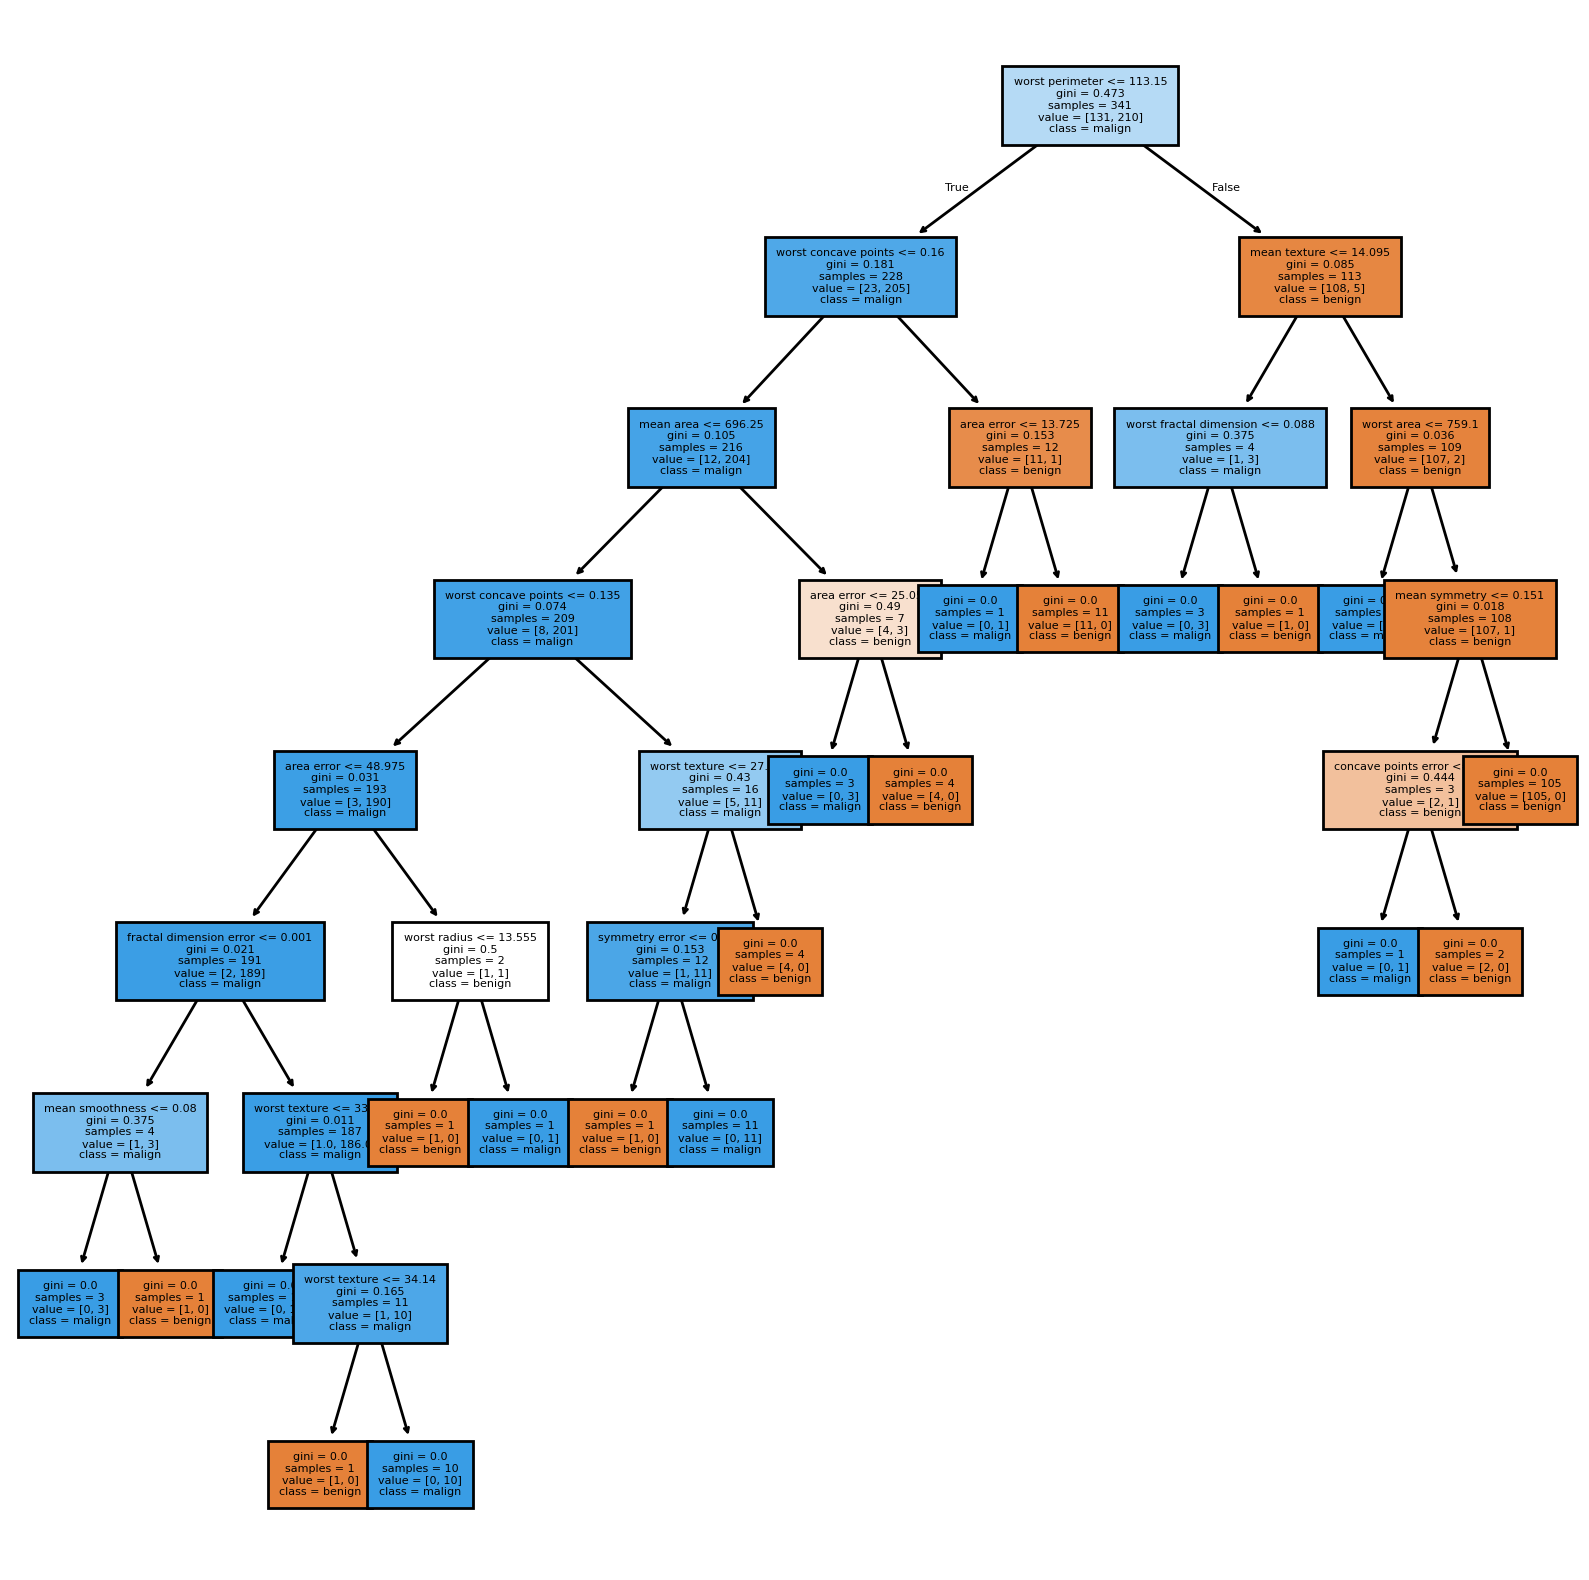

In [12]:
breast_dec_tree = DecisionTreeClassifier()
breast_dec_tree.fit(train[input_features], train['target'])

print('Accuracy: ', round(100*breast_dec_tree.score(test[input_features], test['target']), 2), '%')
print('Depth of the decision tree: ', breast_dec_tree.get_depth())
max_depth = breast_dec_tree.get_depth()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
tree.plot_tree(breast_dec_tree,
               feature_names = input_features, 
               class_names= ['benign', 'malign'],
               label='all',
               impurity=True,
               proportion=False,
               filled=True,
               fontsize=4);

As you can see in the following example, where the depth of the tree is initially restricted to one and we let it grow until the maximum depth we achieved before, the accuracy of the smaller trees is not much worse (if any) than the super tree we trained before... This is the secret sauce why Random Forest is such a good algorithm, but we will review that later in this interactive activity.

This is because the Decision Tree algorithm identifies which input features are the best to split the data for each class (hint: these are the ones that reduce the impurity coefficient, given by the Gini or the Entropy measures).

Seen this way, the input features located at the top of the tree are the ones that "best differentiate between the classes" and therefore are the best ones! 

Most of the 30 input features are not even used to find the "perfectly overfit tree" we just trained above. So, they are not really important.

Accuracy:  92.11 %
Depth of the decision tree:  1
Accuracy:  93.86 %
Depth of the decision tree:  2
Accuracy:  92.98 %
Depth of the decision tree:  3
Accuracy:  93.42 %
Depth of the decision tree:  4
Accuracy:  92.11 %
Depth of the decision tree:  5
Accuracy:  94.3 %
Depth of the decision tree:  6
Accuracy:  92.54 %
Depth of the decision tree:  7


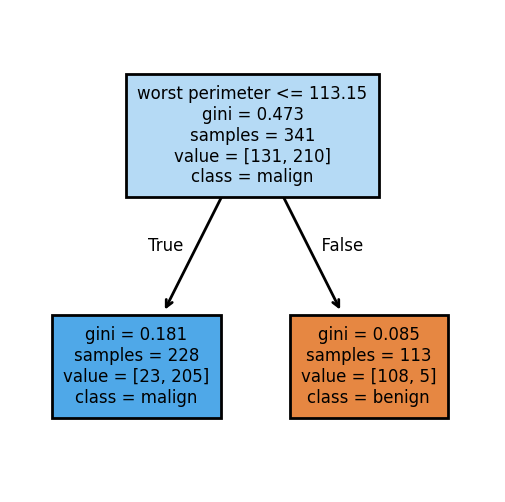

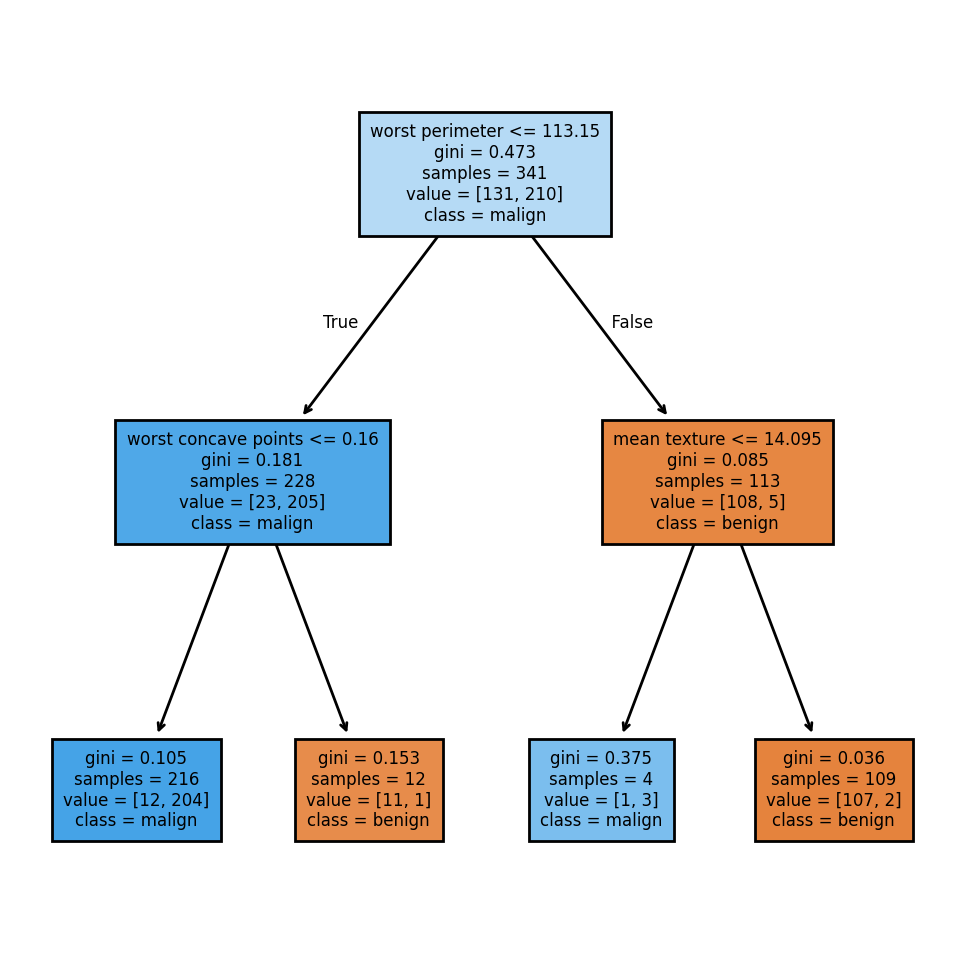

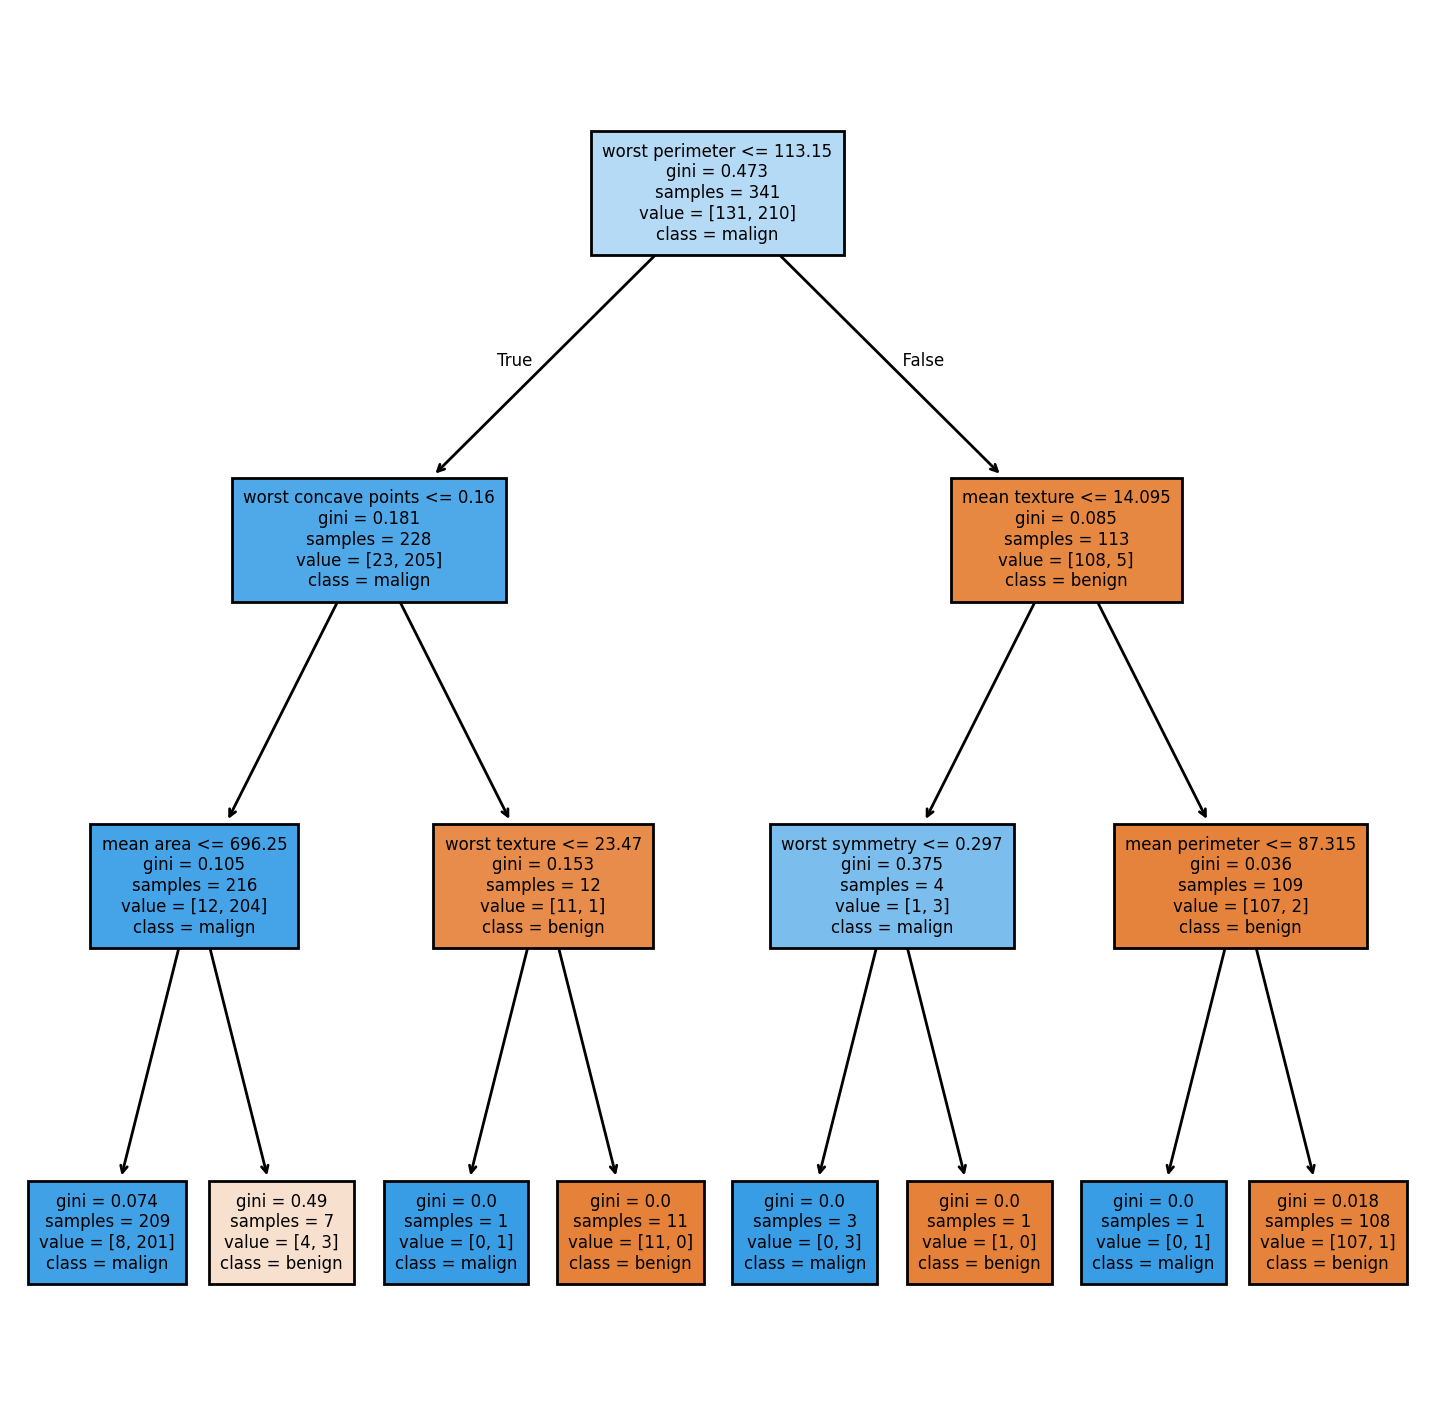

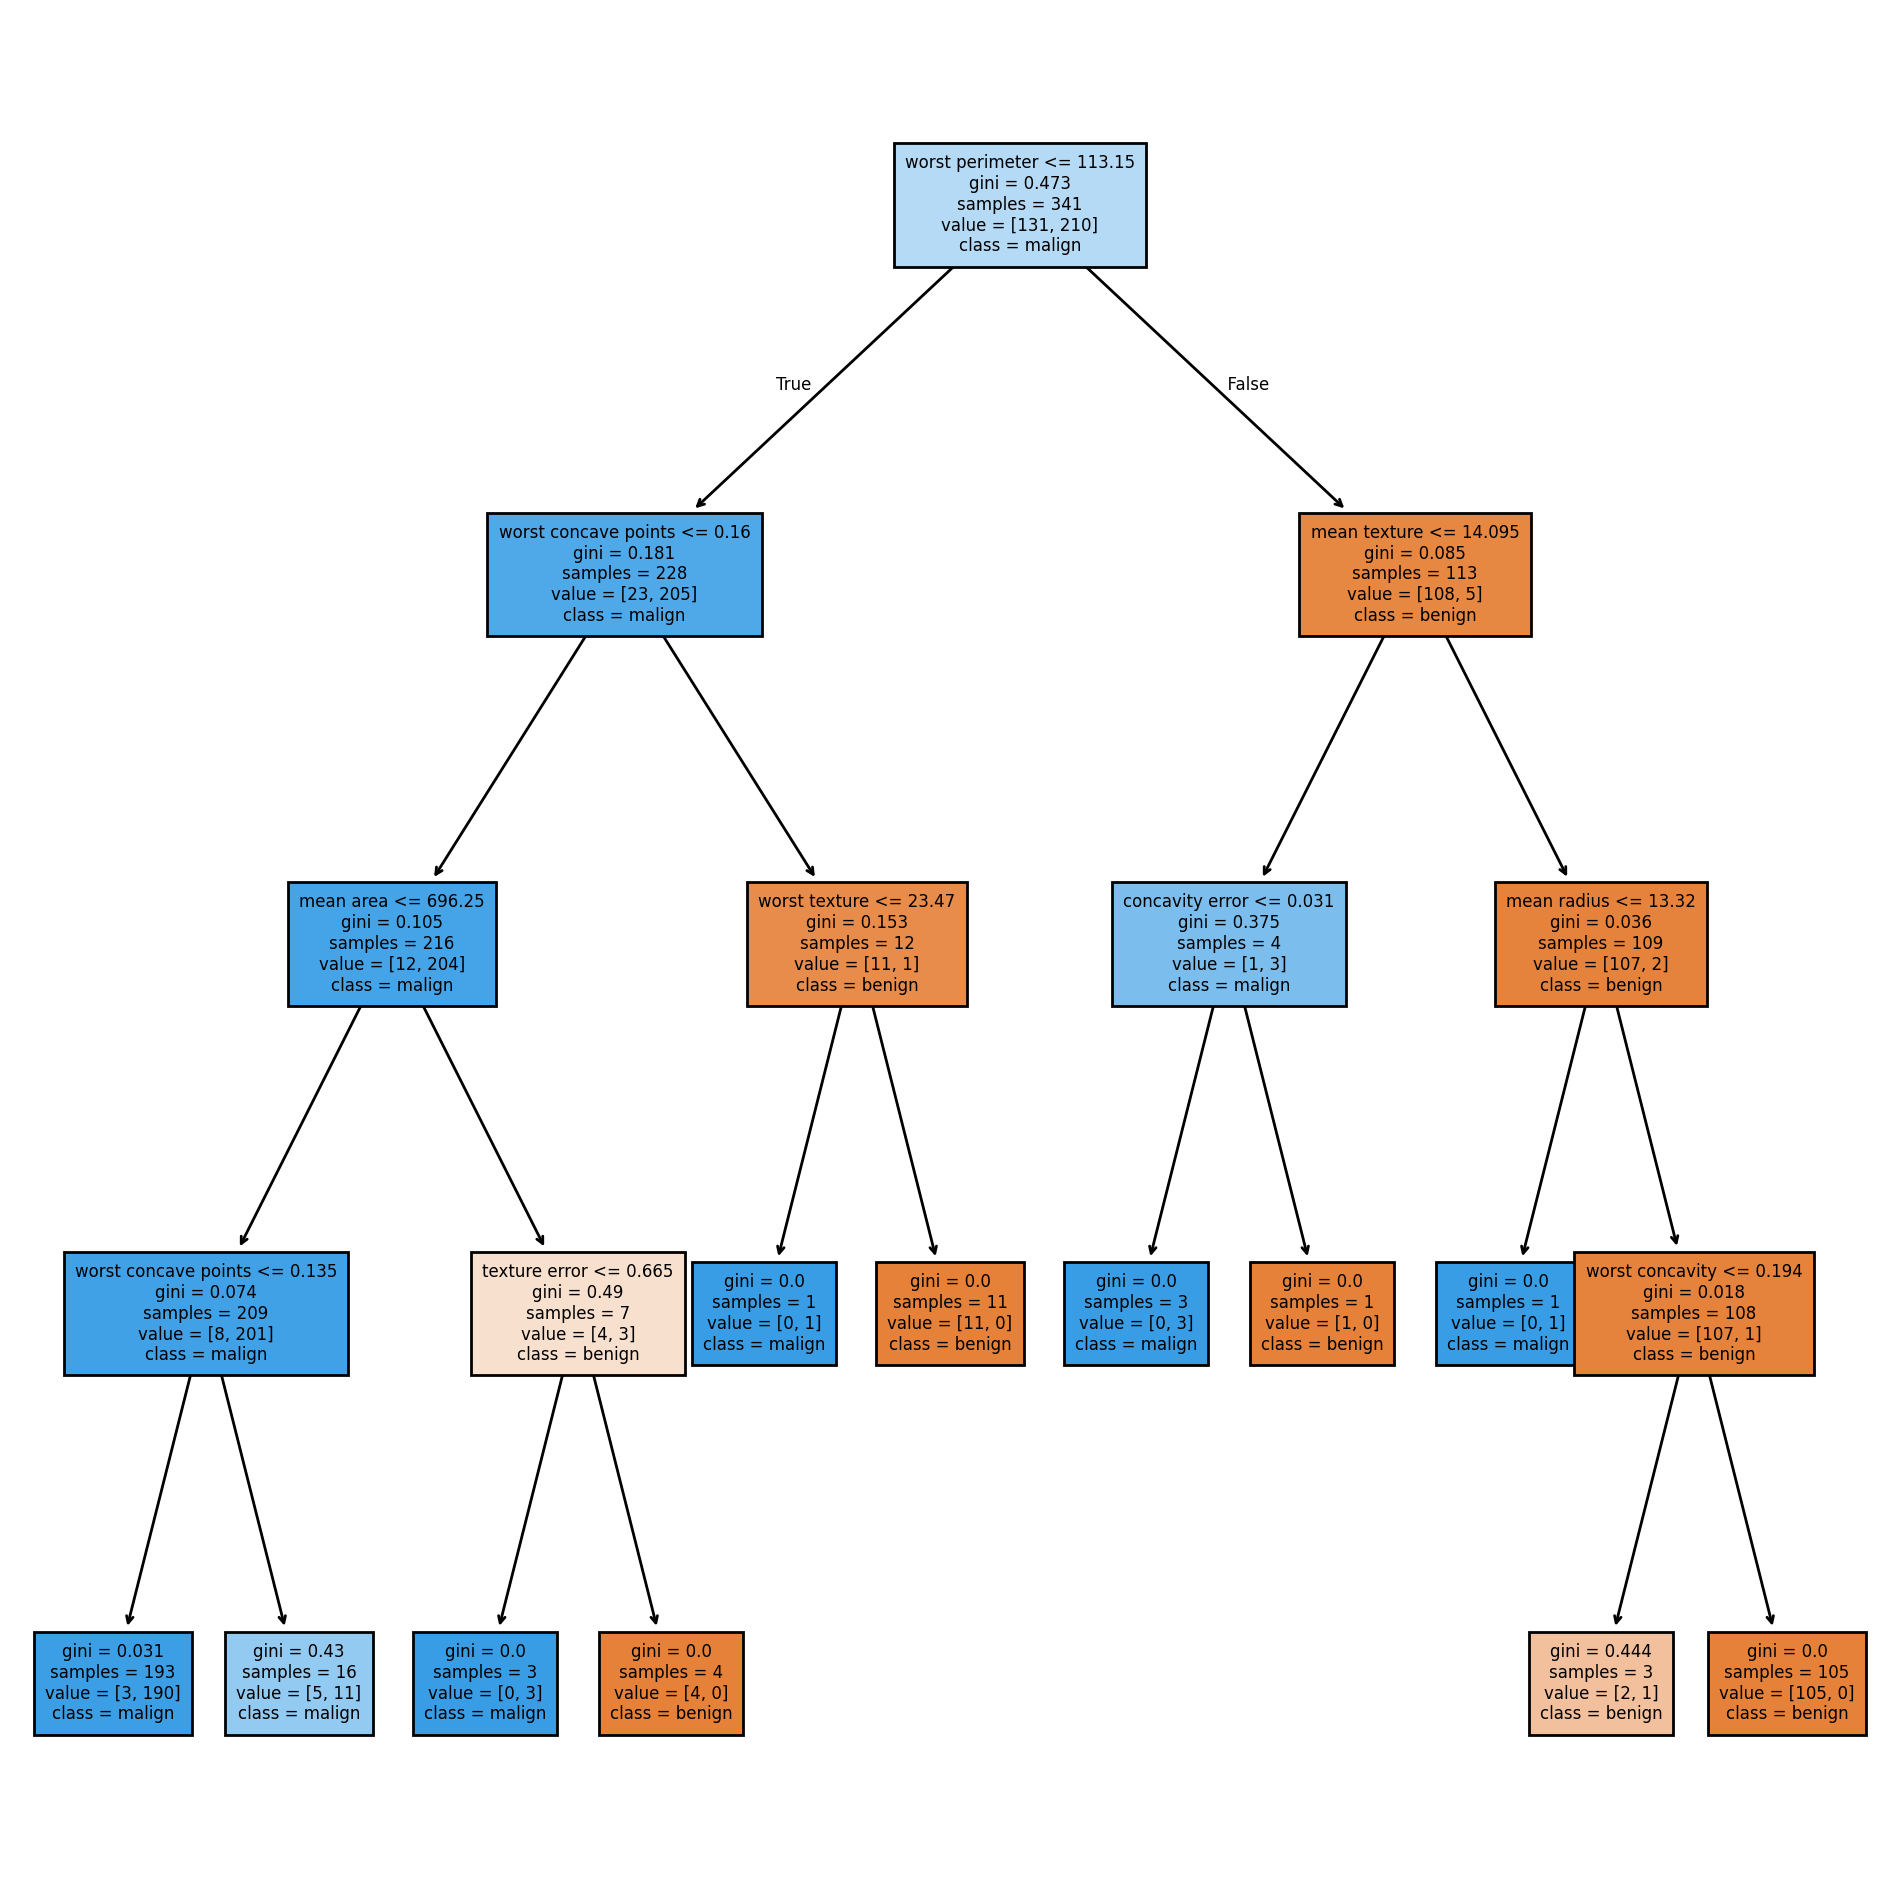

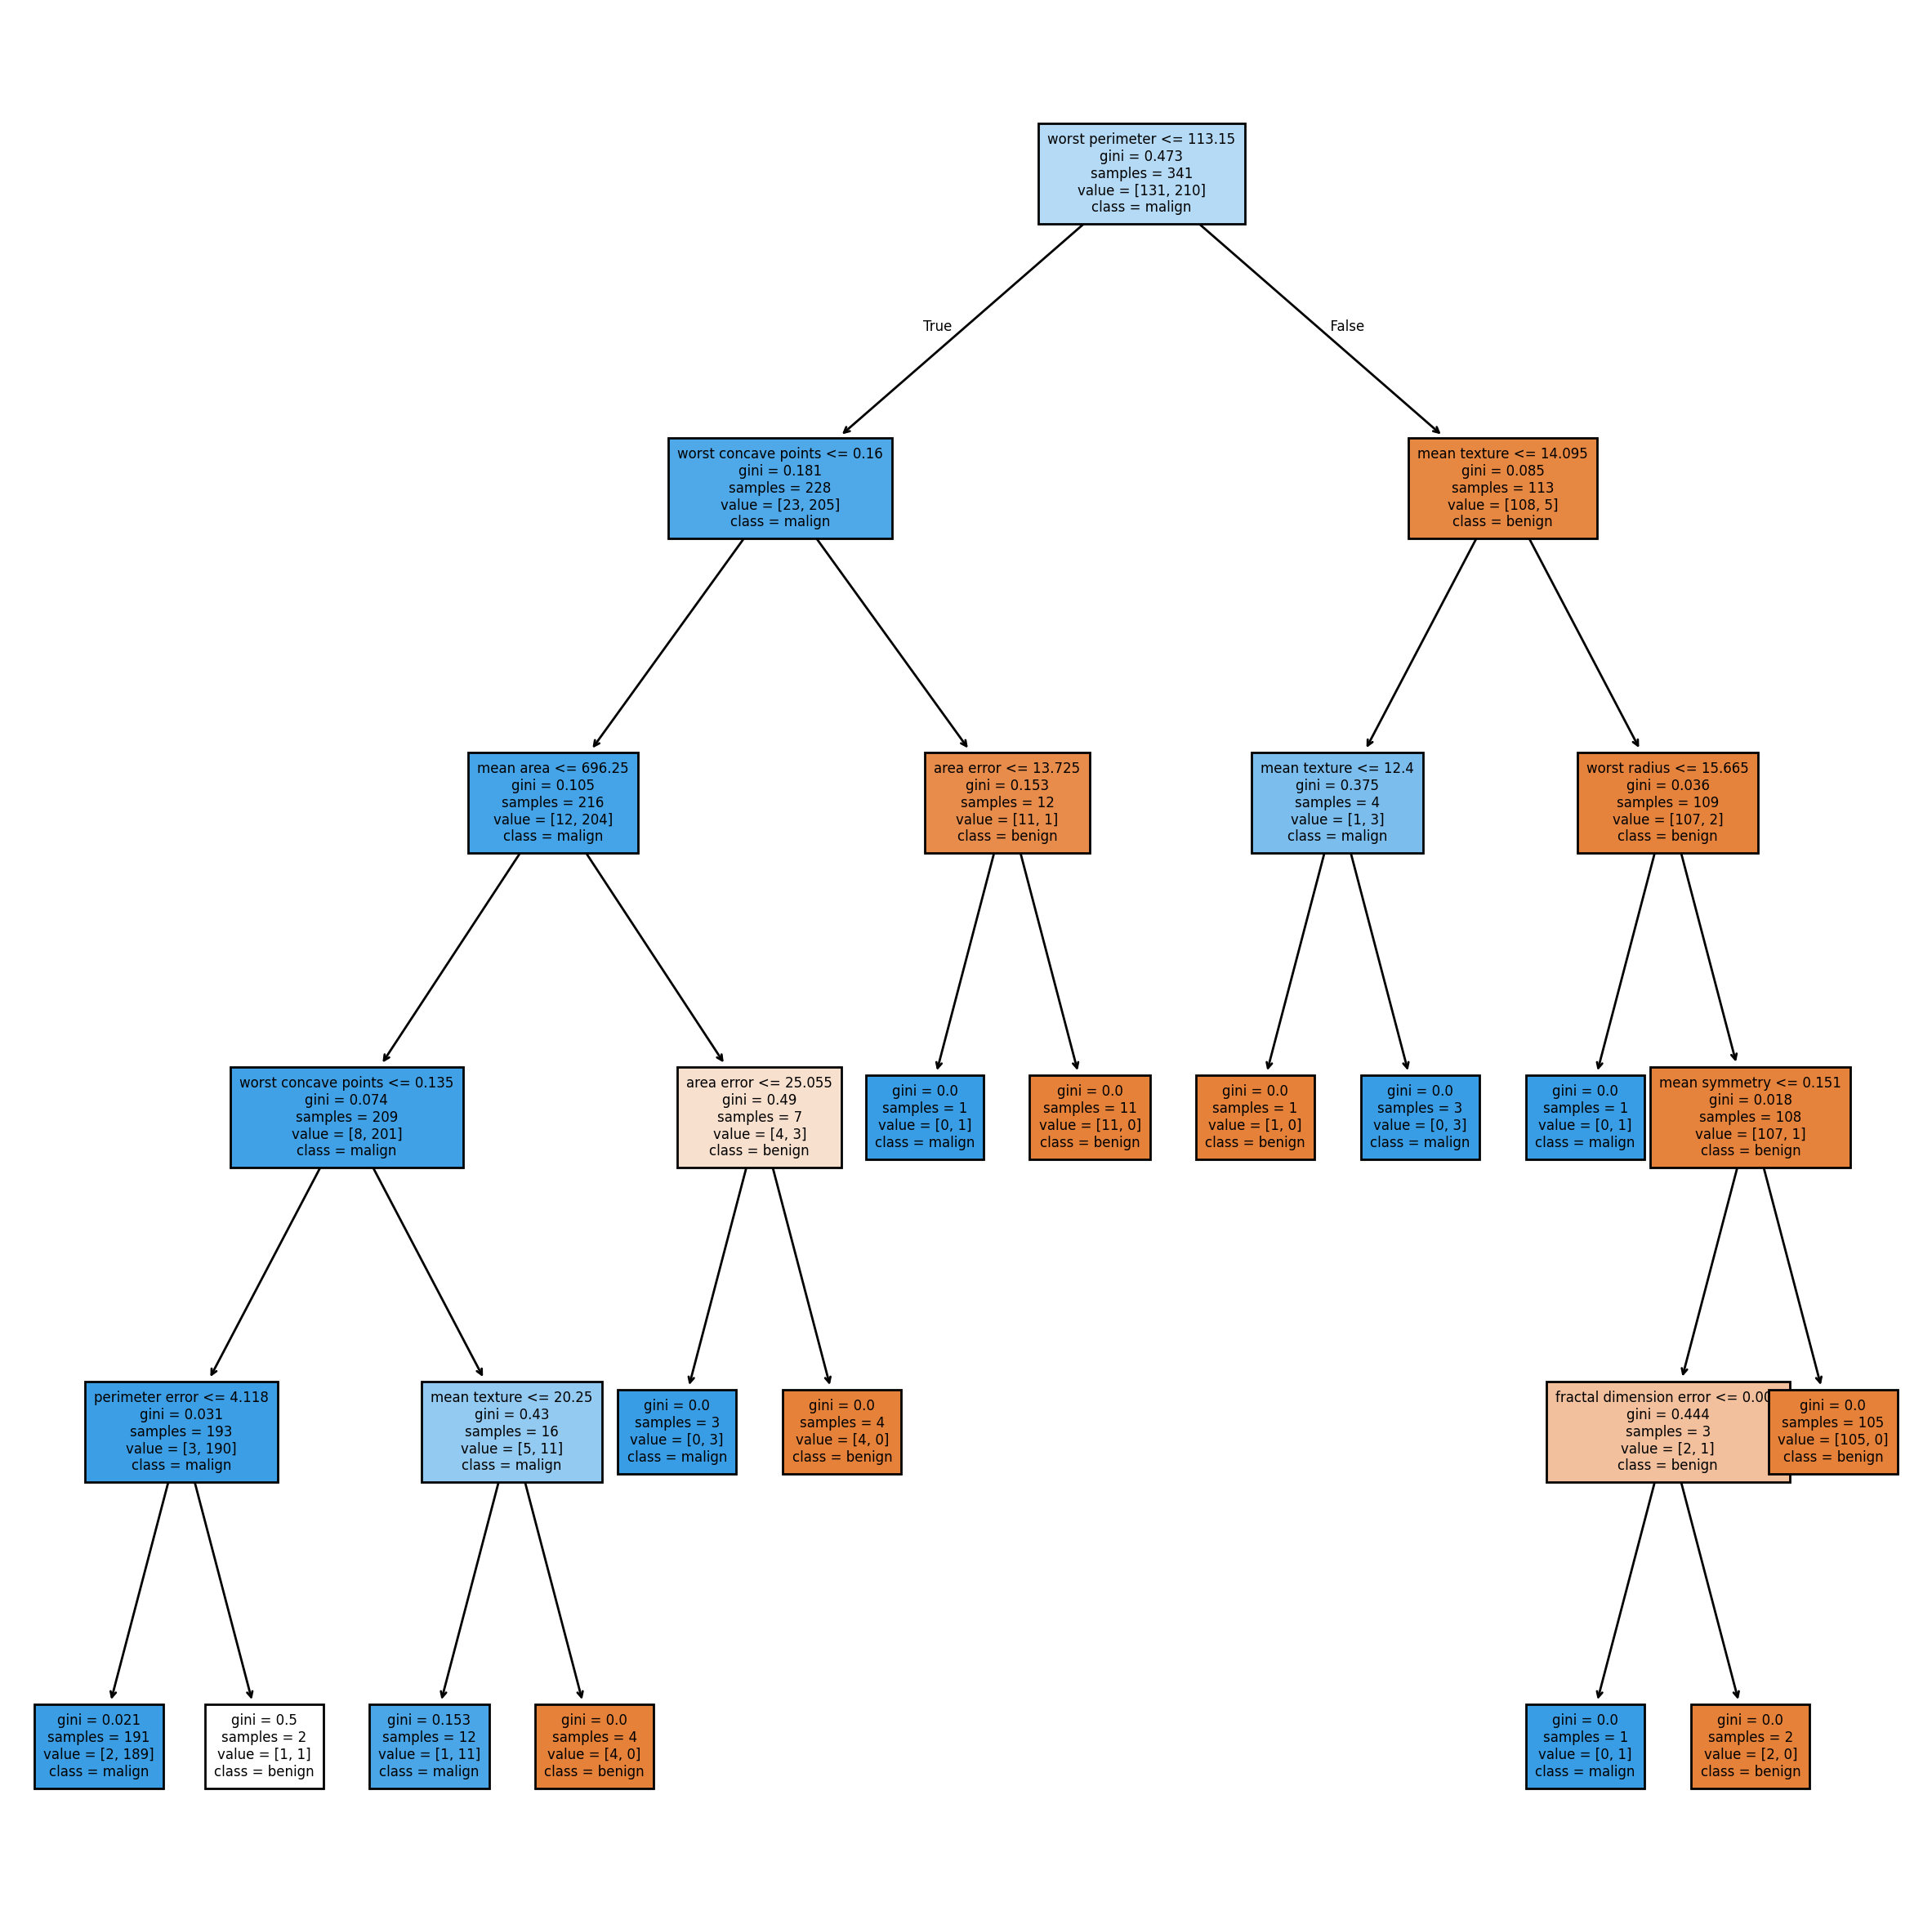

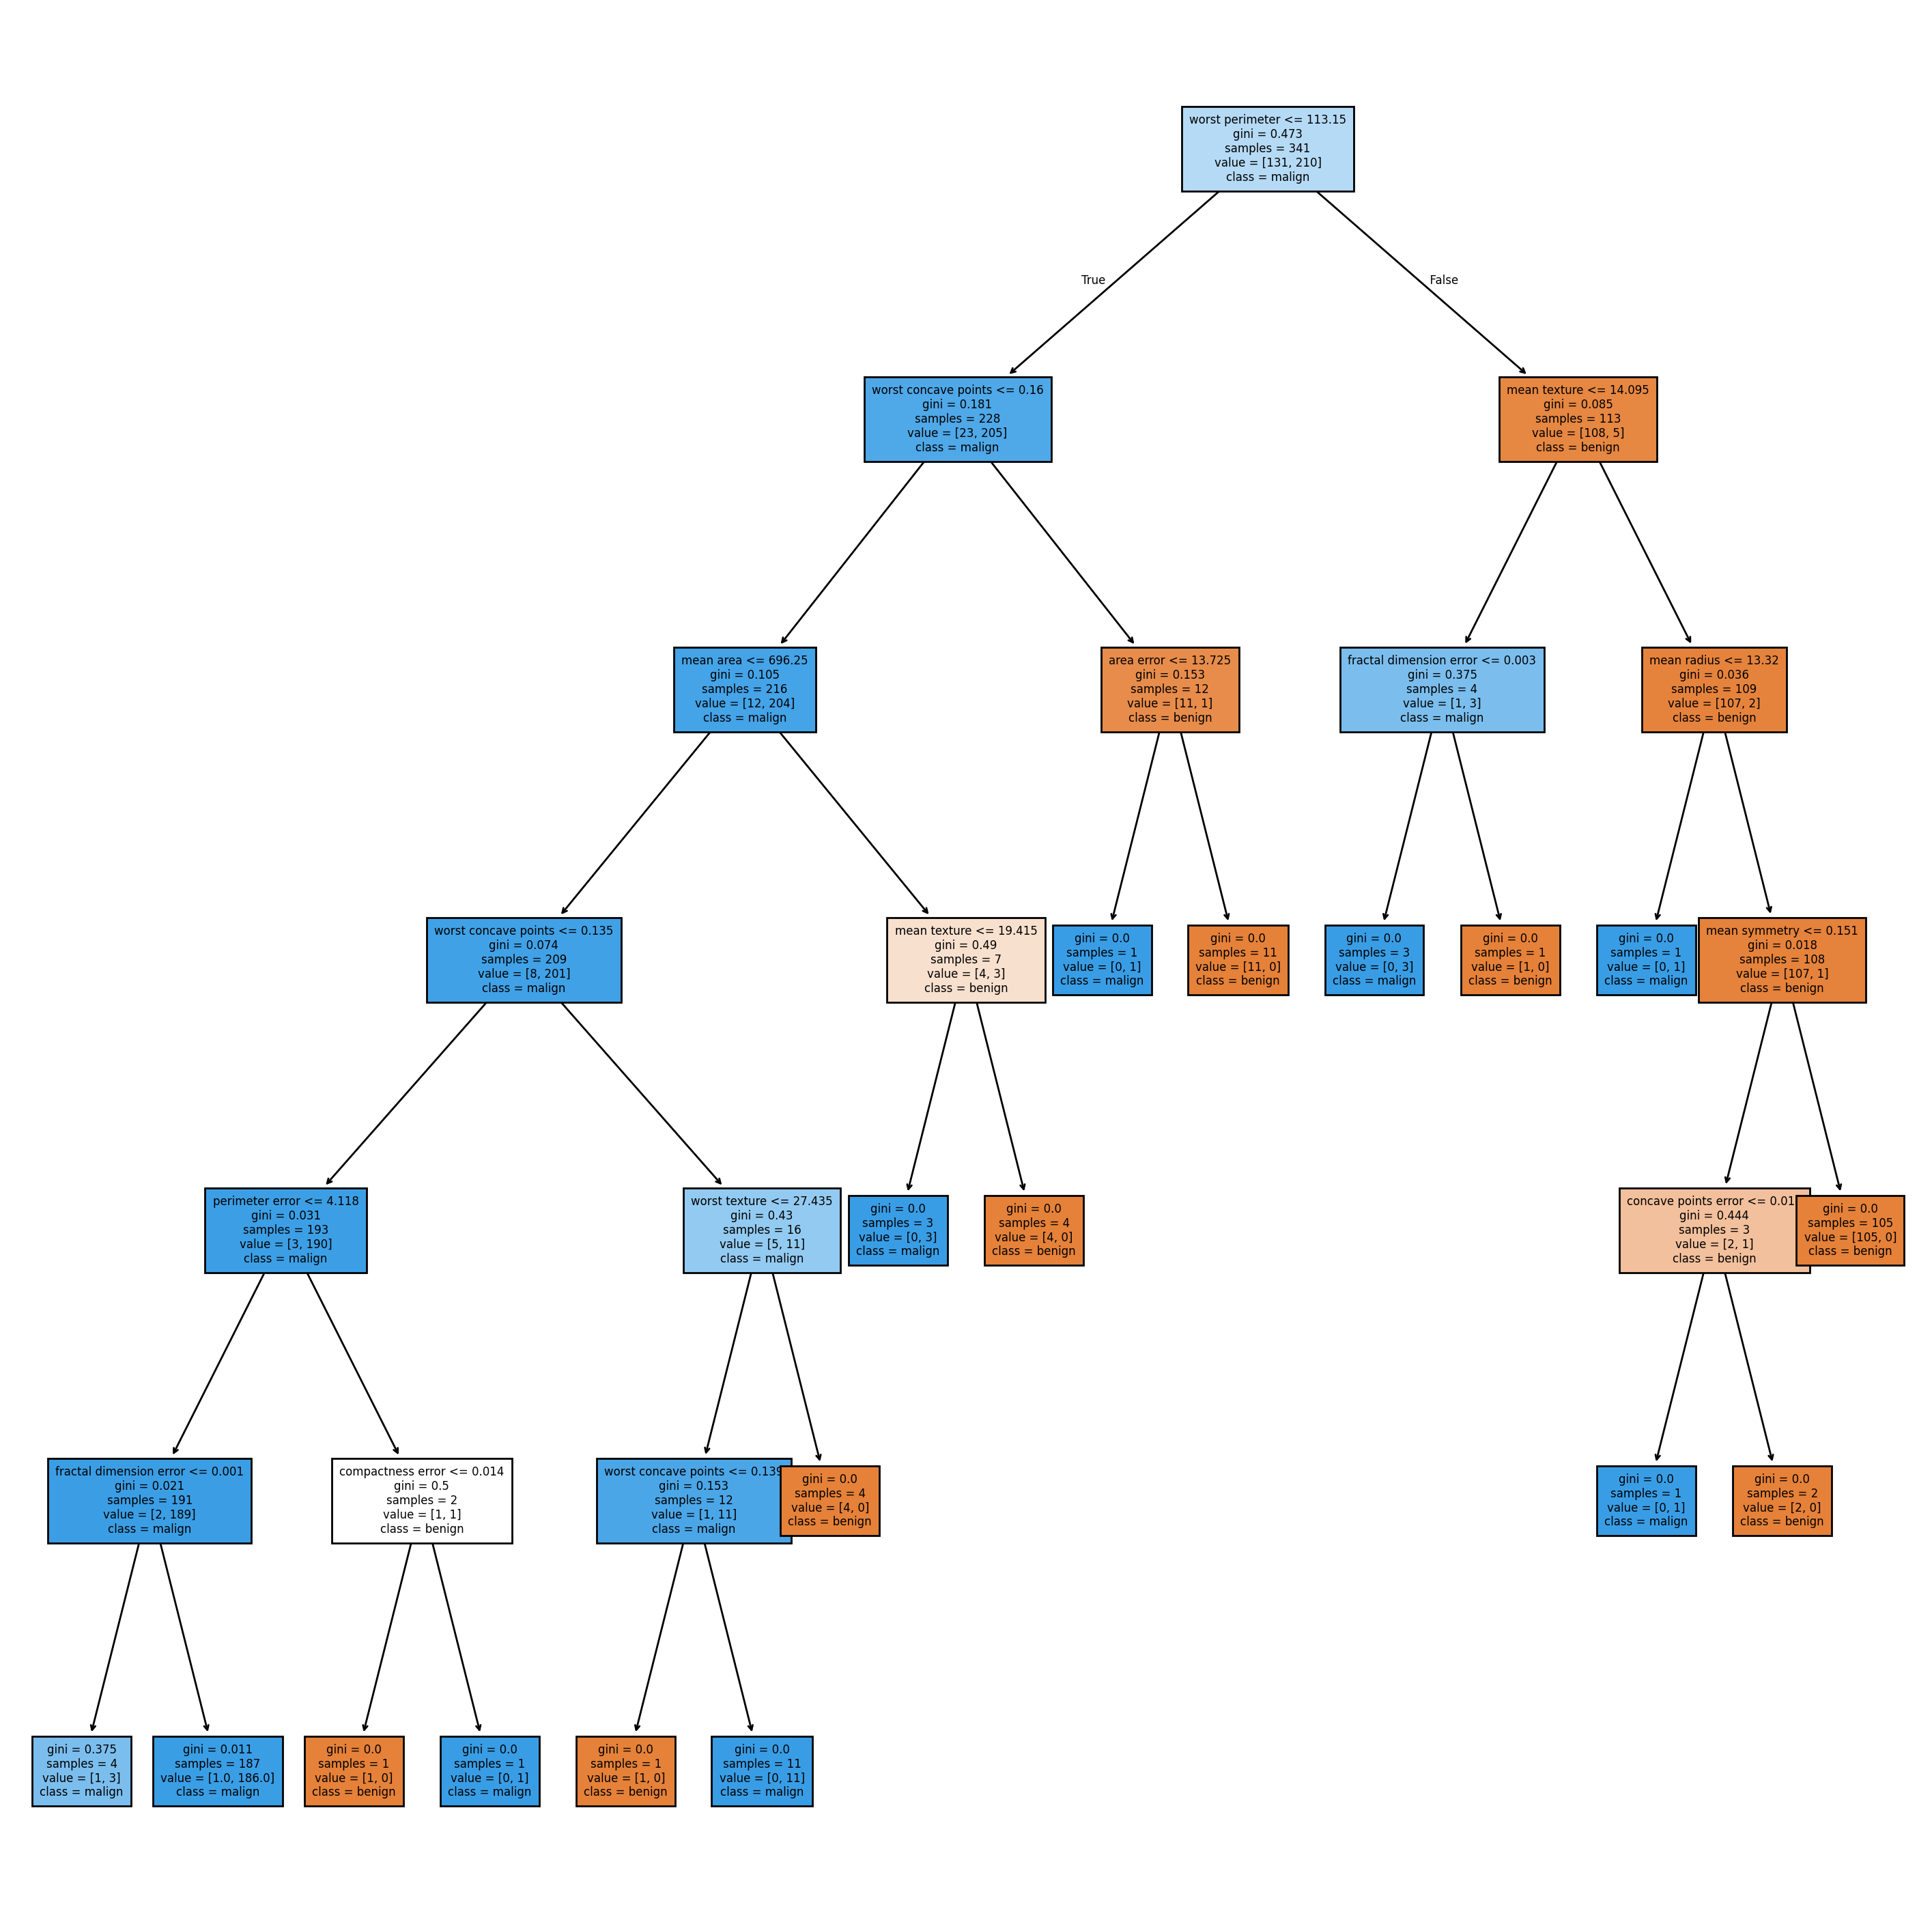

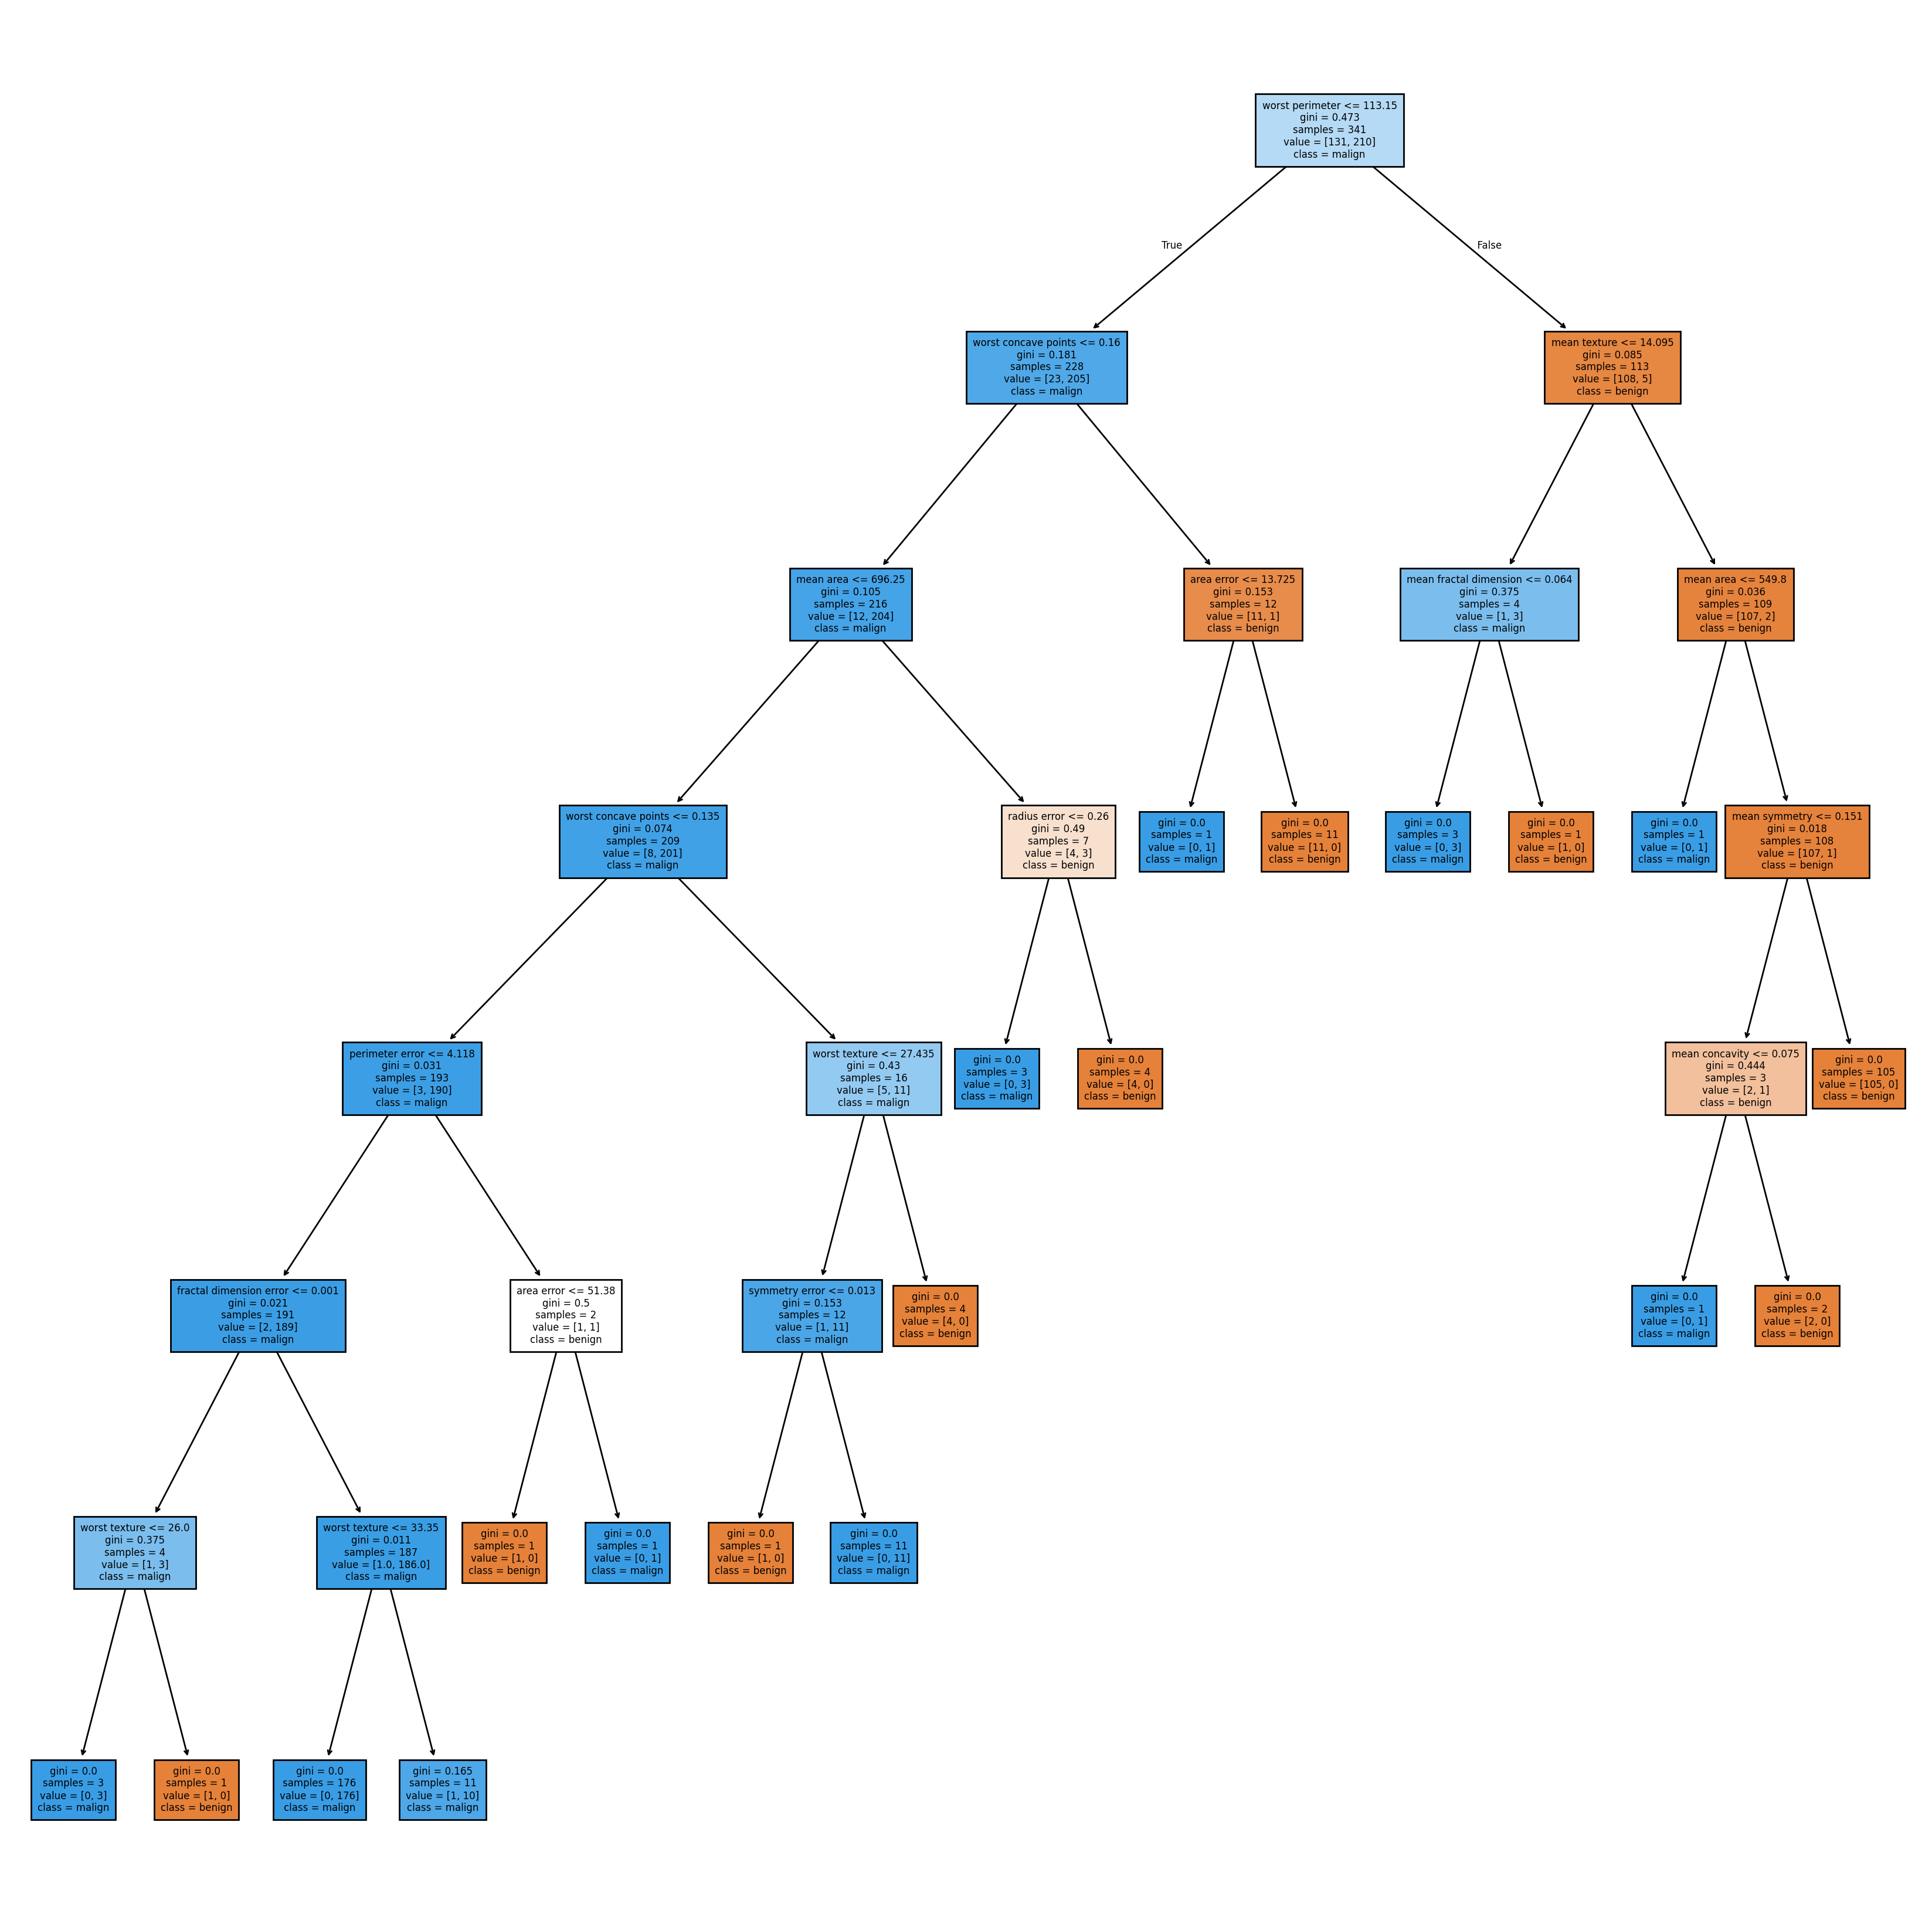

In [13]:
for d in range(1, max_depth):
    breast_dec_tree = DecisionTreeClassifier(max_depth=d)
    breast_dec_tree.fit(train[input_features], train['target'])
    
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (d*3, d*3), dpi=200)
    tree.plot_tree(breast_dec_tree,
                   feature_names = input_features, 
                   class_names= ['benign', 'malign'],
                   label='all',
                   impurity=True,
                   proportion=False,
                   filled=True,
                   fontsize=6);
    print('Accuracy: ', round(100*breast_dec_tree.score(test[input_features], test['target']), 2), '%')
    print('Depth of the decision tree: ', breast_dec_tree.get_depth())

Sklearn actually calculates the importance of the features, based on how much impurity they remove in the tree (that is: how useful they are to divide the data space for the classes of the target feature).

We can just print the parameter `feature_importances_` in our Decision Tree model. Below, using the last Deicision Tree we calculated in the for loop above, I am zipping those values with the list of input features to know which feature each importance coefficient refers to; and then I sort them from larger to smaller.

As you can see, and as expected, the features at the top of the Decision Tree have a much larger importance than the others. Does this mean we can delete the features whose importance is 0? 

NO! (not yet) They might not have been useful for this tree, trained with a random subsample of the data (the training data), but maybe they are useful for some other combinations! To do this feature selection (this is how is called the process of selecting some features and discarding others) we have to use something more powerful, such as Random Forest, with a lot of trees in the forest, so we can be sure whether an input feature is absolutely never used, or is used without much information gain from it - and only then consider removing it from our data (simplifying our data).

In [14]:
sorted(list(zip(breast_dec_tree.feature_importances_, input_features)), reverse=True)

[(np.float64(0.6922287611190262), 'worst perimeter'),
 (np.float64(0.1220170285739397), 'worst concave points'),
 (np.float64(0.04207833225201849), 'worst texture'),
 (np.float64(0.03632940943626222), 'mean area'),
 (np.float64(0.025894164837933234), 'mean texture'),
 (np.float64(0.02149159663865546), 'radius error'),
 (np.float64(0.017760416666666667), 'area error'),
 (np.float64(0.01149203431372549), 'symmetry error'),
 (np.float64(0.009402573529411764), 'mean fractal dimension'),
 (np.float64(0.0083578431372549), 'mean concavity'),
 (np.float64(0.005946316428397155), 'perimeter error'),
 (np.float64(0.004062840413943377), 'mean symmetry'),
 (np.float64(0.0029386826527653324), 'fractal dimension error'),
 (np.float64(0.0), 'worst symmetry'),
 (np.float64(0.0), 'worst smoothness'),
 (np.float64(0.0), 'worst radius'),
 (np.float64(0.0), 'worst fractal dimension'),
 (np.float64(0.0), 'worst concavity'),
 (np.float64(0.0), 'worst compactness'),
 (np.float64(0.0), 'worst area'),
 (np.floa

Let's now train another decision tree for the Breast Cancer data. This time I will list all of the parameters - tune them and see what is the maximum accuracy you can get:

Here we trained a Decision Tree tuning some parameters. 
Modify them to see how the structure and nodes of the Decision Tree changes:
Accuracy:  93.42 %
As you can see, our resulting Decision Tree has less or equal than 5 leaf nodes now. 
Feel free to change that parameter and the others:


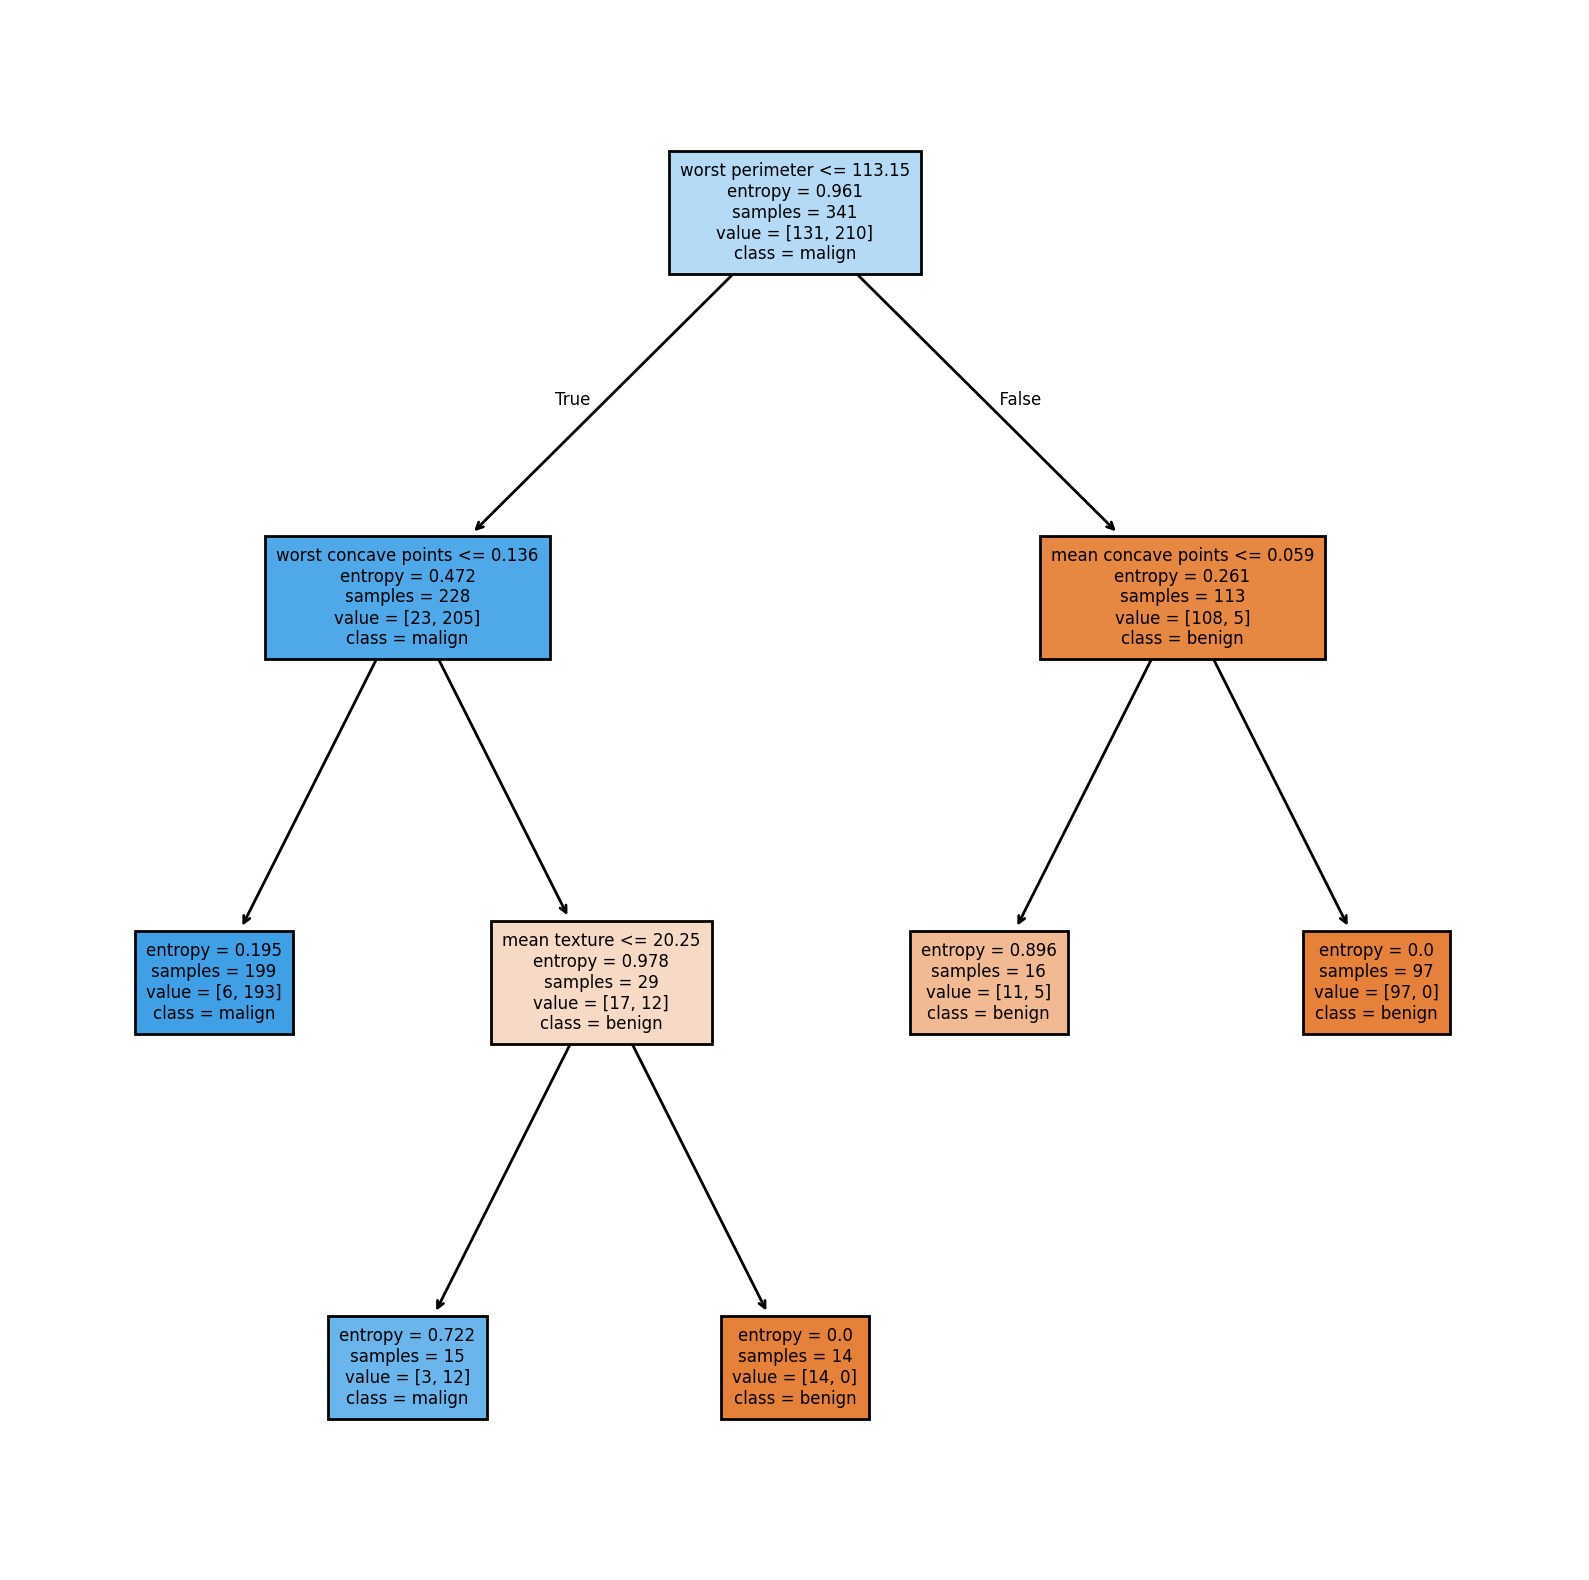

In [15]:
print("Here we trained a Decision Tree tuning some parameters. \nModify them to see how the structure and nodes of the Decision Tree changes:")
breast_dec_tree = DecisionTreeClassifier(
    criterion='entropy', # Could also be 'gini'
    splitter='best',     # Could also be 'random'
    max_depth=100,        # We've seen this already - how much the tree can grow "vertically"
    min_samples_split=3, # Only divide a leaf node if it has more than 3 samples in it - you can see how many samples represent each node in the trees above with the parameter "samples"
    min_samples_leaf=3,  # Leaf nodes are not allowed to represent less than 3 samples in them
    max_leaf_nodes=5,    # The number number of leaf nodes we allow - or how much the tree can grow "horizontally"
    min_impurity_decrease=0, # We only allow a leaf node to be split into two if the impurity is reduced more than this parameter
    # class_weight='balanced', # If you want to give more weight at some classes over others, so the resulting tree will be more specialised in predicting some classes better 
    
)
breast_dec_tree.fit(train[input_features], train['target'])
predictions = breast_dec_tree.predict(test[input_features])

# We calculate its accuracy (without using the `score` function as before):
right_predictions = 0
for p, r in zip(predictions, test['target']):
    if p==r:
        right_predictions+=1
print('Accuracy: ', round(100*right_predictions/len(predictions), 2), '%')


# And finally we plot it out:
print("As you can see, our resulting Decision Tree has less or equal than 5 leaf nodes now. \nFeel free to change that parameter and the others:")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
tree.plot_tree(breast_dec_tree,
               feature_names = input_features, 
               class_names= ['benign', 'malign'],
               label='all',
               impurity=True,
               proportion=False,
               filled=True,
               fontsize=6);

Please note that we have used `DecisionTreeClassifier`, but SciKit Learn also provides a `DecisionTreeRegressor` in case our problem is a regression problem - but you know the contraints, Decision Trees are generally not good regressors.

# Random Forest

##### As you can already imagine, we use Random Forest like any other classifier, the methods `fit` and `predict` are the most important ones to be used, along with `predict_proba` if we wanted to know how confident the classifier is about his predictions

###### In the `RandomForestClassifier`, we have exactly the same parameters as in the `DecisionTreeClassifier` (apart from `splitter`), so we can define how the trees in the forest look like. We also have some extra parameters to define how the entire forest looks like:

* Number of Estimators: This is how many trees we want to have in our forest.
* Boostrap: Whether we are going to use Boostrap Aggregating or not (subsampling our training data to get more non-repeated trees)
* max_samples: The number of records to be subsampled in each iteration of the Bootstrap process
* n_jobs: We are training many trees in our forest - this can be parallellised. Use -1 to use all the processors in your computer
* warm_start: To re-use the trees from a previous `fit` call so we don't have to recreate again our forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# See how many parameters we can tune in order to achieve greater accuracy using Random Forest.
# Feel free to tweak them in order to achieve the maximum possible accuracy in the `predict` two cells below...

breast_rf = RandomForestClassifier(
    # Decision Tree Parameters:
    criterion='entropy', # Could also be 'gini'
    max_depth=1,         # How much the tree can grow "vertically"
    min_samples_split=2, # Only divide a leaf node if it has more than 3 samples in it - you can see how many samples represent each node in the trees above with the parameter "samples"
    min_samples_leaf=1,  # Leaf nodes are not allowed to represent less than 3 samples in them
    max_leaf_nodes=2,    # The number number of leaf nodes we allow - or how much the tree can grow "horizontally"
    min_impurity_decrease=0, # We only allow a leaf node to be split into two if the impurity is reduced more than this parameter
    
    # Forest Parameters:
    n_estimators=2,
    bootstrap=True,
    max_samples=len(test),
    n_jobs=-1,
    warm_start=False,
)

In [18]:
breast_rf.fit(train[input_features], train['target'])

RandomForestClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2,
                       max_samples=228, min_impurity_decrease=0, n_estimators=2,
                       n_jobs=-1)

In [19]:
print("We can probably achieve over 96% accuracy here...\nI set some parameters wrong on purpose above when defining our Random Forest model.\nWhat parameters of this Random Forest could we tweak to achieve that accuracy?")
print('Accuracy: ', round(100*breast_rf.score(test[input_features], test['target']), 2), '%')

We can probably achieve over 96% accuracy here...
I set some parameters wrong on purpose above when defining our Random Forest model.
What parameters of this Random Forest could we tweak to achieve that accuracy?
Accuracy:  89.91 %


In [20]:
print("As mentioned above, now we can get a more realistic list of feature importances.\nSome of them are much more important than others, but not as much as when having one single tree:")
sorted(list(zip(breast_rf.feature_importances_, input_features)), reverse=True)

As mentioned above, now we can get a more realistic list of feature importances.
Some of them are much more important than others, but not as much as when having one single tree:


[(np.float64(0.5), 'worst perimeter'),
 (np.float64(0.5), 'mean perimeter'),
 (np.float64(0.0), 'worst texture'),
 (np.float64(0.0), 'worst symmetry'),
 (np.float64(0.0), 'worst smoothness'),
 (np.float64(0.0), 'worst radius'),
 (np.float64(0.0), 'worst fractal dimension'),
 (np.float64(0.0), 'worst concavity'),
 (np.float64(0.0), 'worst concave points'),
 (np.float64(0.0), 'worst compactness'),
 (np.float64(0.0), 'worst area'),
 (np.float64(0.0), 'texture error'),
 (np.float64(0.0), 'symmetry error'),
 (np.float64(0.0), 'smoothness error'),
 (np.float64(0.0), 'radius error'),
 (np.float64(0.0), 'perimeter error'),
 (np.float64(0.0), 'mean texture'),
 (np.float64(0.0), 'mean symmetry'),
 (np.float64(0.0), 'mean smoothness'),
 (np.float64(0.0), 'mean radius'),
 (np.float64(0.0), 'mean fractal dimension'),
 (np.float64(0.0), 'mean concavity'),
 (np.float64(0.0), 'mean concave points'),
 (np.float64(0.0), 'mean compactness'),
 (np.float64(0.0), 'mean area'),
 (np.float64(0.0), 'fractal di

In [21]:
# We can see all of the trees in the forest!
print("Our random forest model has", len(breast_rf.estimators_), "trees")

print("\nLet's check the first 5:")
for t in breast_rf.estimators_[:5]:
    print(t)

Our random forest model has 2 trees

Let's check the first 5:
DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=2, min_impurity_decrease=0,
                       random_state=745344052)
DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=2, min_impurity_decrease=0,
                       random_state=1771706694)
